Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

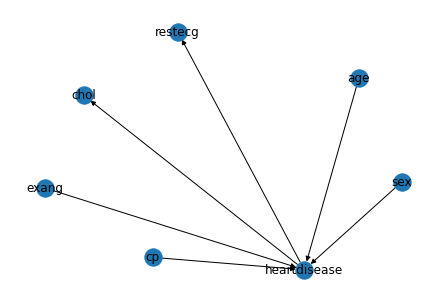


 Learning CPD using Maximum likelihood estimators


Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 4/4 [00:00<00:00, 68.34it/s]

Eliminating: age:  75%|█████████████████████████████████████████████████▌                | 3/4 [00:00<00:00, 29.51it/s]


 Inferencing with Bayesian Network:

 1.Probability of HeartDisease given evidence=restecg :1



Eliminating: exang: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.59it/s]


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+

 2.Probability of HeartDisease given evidence= cp:2 


Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 160.25it/s]

Eliminating: exang: 100%|████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 43.06it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdisease(2) |              0.1373 |
+-----------------+---------------------+
| heartdisease(3) |              0.1537 |
+-----------------+---------------------+
| heartdisease(4) |              0.1321 |
+-----------------+---------------------+


In [2]:
import pandas as pd
import numpy as np
#read Cleveland Heart Disease data
data = pd.read_csv('lab7_data.csv')
data = data.replace('?',np.nan)
#display the data
print('Sample instances from the dataset are given below')
print(data.head())
#display the Attributes names and datatyes
print('\n Attributes and datatypes')
print(data.dtypes)

#pip install pgmpy

from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

#Creat Model- Bayesian Network
## Defining the model structure. We can define the network by just passing a list of edges.
model =BayesianModel([('age','heartdisease'),('sex','heartdisease'),
                      ('exang','heartdisease'),('cp','heartdisease'),
                      ('heartdisease','restecg'),('heartdisease','chol')])
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(model, with_labels = True); 
plt.show()

#Learning CPDs using Maximum Likelihood Estimators for all the variables
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(data,estimator=MaximumLikelihoodEstimator)

#print(model.get_cpds('cp'))

# Inferencing with Bayesian Network
print('\n Inferencing with Bayesian Network:')
infer = VariableElimination(model)

#computing the Probability of HeartDisease given restecg
print('\n 1.Probability of HeartDisease given evidence=restecg :1')
q1=infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

#computing the Probability of HeartDisease given cp
print('\n 2.Probability of HeartDisease given evidence= cp:2 ')
q2=infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)